# Twitter-Bitcoin Correlation Analysis

## 1. Correlation with Sentimental Data & Price of Bitcoin

- Bitcoin 가격과 김도영 학우가 만든 전처리기, 감성분석기를 이용해 상관관계를 확인하기 전 데이터에 대한 분석을 진행하였습니다. 

### 1.1 필요한 라이브러리 import

In [1]:
# nltk 활용을 위한 불용어 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kimjuwon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
from sentimentalAnalysis import sentimental_analysis
import matplotlib.pyplot as plt
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from coincrawler import coin_crawl_his
from data_pipeline import coin_data_pipeline
from data_concat import data_concat
from Greed_Fear_Model import Greed_Fear_Model
import statsmodels.api as sm 
import numpy as np

### 1.2 필요한 데이터 로드 

- Bitcoin_tweet.csv 파일을 로드하고 해당 어트리뷰트는 무엇인지 데이터 수 등 파악
- 'text'라는 컬럼부분을 'tweet'으로 바꿈 
- 데이터를 파악하여 칼럼 값에 결측치가 있는 것을 확인하였음. 결측치가 있을 경우 학습이 안될 가능성이 높고, compile이 되지 않을 가능성이 높으므로 해당값을 제거해주는 방식으로 코딩을 진행하였음

## ZILLIQA 데이터 모델링 ( Target  : 'target_close')

In [3]:
train_data = pd.read_csv('twitter_dataset.csv').drop('Unnamed: 0',axis=1)
train_data

,close,count,flair_avg,flair_sum,follower_number_avg,follower_number_sum,following_number_avg,following_number_sum,high,likes_avg,...,target_market cap,target_open,target_vol,textblob_avg,textblob_sum,tweet_length,vader_avg,vader_sum,vol,date
0,-0.834088,-1.162789,-1.056379,-0.376469,-1.072859,-1.072859,1.227984,-1.060005,-0.927379,-0.137619,...,-0.779133,-0.834254,1.662144,-1.601728,-1.138748,-1.182562,-1.535078,-1.119193,1.033283,2021-02-05
1,-0.711882,-1.068993,-1.235151,-0.545274,-1.015768,-1.015768,-0.314583,-1.018168,-0.649014,-0.338438,...,-0.818141,-0.713469,1.357839,-1.158831,-1.069072,-1.122227,-1.415935,-1.068959,1.734918,2021-02-06
2,-0.751383,-1.083678,-0.535172,-0.391719,-1.045025,-1.045025,-0.100330,-1.021493,-0.779103,-0.147790,...,-0.028745,-0.752944,3.236651,0.142859,-1.037176,-1.127292,-1.392941,-1.075469,1.413791,2021-02-07
3,0.043167,-0.928713,-0.736080,-0.597182,-0.812995,-0.812995,-0.328227,-0.904136,-0.079952,0.256561,...,0.002283,0.039924,2.732172,-1.227601,-0.980785,-1.033034,-1.117558,-0.975328,3.396462,2021-02-08
4,0.074177,-1.005514,-0.710590,-0.507052,-0.917393,-0.917393,-0.082401,-0.952532,0.111223,0.417199,...,-0.166597,0.070861,2.496644,-1.380534,-1.037433,-1.078297,-1.222505,-1.025534,2.864096,2021-02-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-0.541904,1.894998,0.335520,-0.157058,1.384053,1.384053,0.067868,1.687080,-0.634168,0.533864,...,-0.441939,-0.542038,-0.741982,0.667252,1.909231,1.813030,0.217156,1.598256,-0.338946,2022-04-18
138,-0.468197,1.993235,0.698866,1.070373,1.490971,1.490971,-0.206844,1.573259,-0.561233,-0.093481,...,-0.455878,-0.468862,-0.610535,1.432367,2.449276,2.012100,0.723046,2.056435,-0.802109,2022-04-19
139,-0.482182,-0.619079,0.618422,-0.029962,-0.579661,-0.579661,-0.447369,-0.668518,-0.513079,0.493986,...,-0.549225,-0.483009,-0.215970,0.869339,-0.540314,-0.624177,-0.013668,-0.636935,-0.663395,2022-04-20
140,-0.574462,0.516362,0.138831,-0.553187,0.701472,0.701472,-0.715335,0.120478,-0.431578,0.770656,...,-0.635999,-0.574881,-0.600496,0.361420,0.456422,0.489720,-0.174005,0.233722,-0.247019,2022-04-21


In [4]:
vader_textblob_ziliqa_train_data = pd.read_csv('vader_textblob_ziliqa_train_data').drop('Unnamed: 0',axis=1)
flair_ziliqa_train_data = pd.read_csv('flair_ziliqa_train_data.csv').drop('Unnamed: 0',axis=1)
ziliqa_train_data = pd.read_csv('ziliqa_train_data').drop('Unnamed: 0',axis=1)
vader_textblob_ziliqa_test_data = pd.read_csv('vader_textblob_ziliqa_test_data').drop('Unnamed: 0',axis=1)
flair_ziliqa_test_data = pd.read_csv('flair_ziliqa_test_data.csv').drop('Unnamed: 0',axis=1)
ziliqa_test_data = pd.read_csv('ziliqa_test_data').drop('Unnamed: 0',axis=1)

In [5]:
gfmodel = Greed_Fear_Model(ziliqa_train_data,ziliqa_test_data)

In [6]:
coin =  gfmodel.coin_data_load('zilliqa')

  0%|          | 0/1575 [00:00<?, ?it/s]

In [7]:
gfmodel.convert_train_data(vader_textblob_ziliqa_train_data,flair_ziliqa_train_data)
gfmodel.convert_test_data(vader_textblob_ziliqa_test_data,flair_ziliqa_test_data)

(1237, 11)
(1237, 12)
date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/1237 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

date                0
user_id             0
user_name           0
user_screen_name    0
tweet               0
retweets            0
likes               0
follower_number     0
following_number    0
vader               0
textblob            0
flair               0
dtype: int64


  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

,date,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,...,close,vol,market cap,target_date,target_open,target_high,target_low,target_close,target_vol,target_market cap
0,2022-04-28,3642,7.3876,0.217282,5.395238,0.158683,-1.991711,-0.058580,12663,372.441176,...,0.09106,3.728912e+08,1.157634e+09,2022-04-29,0.09106,0.09244,0.08245,0.08345,3.571432e+08,1.061264e+09
1,2022-04-29,30767,33.0562,0.118058,25.851389,0.092326,-25.390274,-0.090680,524124,1871.871429,...,0.08345,3.571432e+08,1.061264e+09,2022-04-30,0.08346,0.08690,0.07103,0.07194,5.138357e+08,9.151872e+08
2,2022-04-30,19010,43.1099,0.224531,25.949394,0.135153,-52.243835,-0.272103,123053,640.901042,...,0.07194,5.138357e+08,9.151872e+08,2022-05-01,0.07196,0.07406,0.06917,0.07345,4.513743e+08,9.346244e+08
3,2022-05-01,12956,17.1932,0.139782,19.507778,0.158600,-41.535857,-0.337690,92067,748.512195,...,0.07345,4.513743e+08,9.346244e+08,2022-05-02,0.07344,0.07439,0.06756,0.06990,2.741005e+08,8.898452e+08
4,2022-05-02,8633,17.9822,0.202047,8.174507,0.091848,-12.114204,-0.136115,74932,841.932584,...,0.06990,2.741005e+08,8.898452e+08,2022-05-03,0.06991,0.07180,0.06692,0.06780,2.264199e+08,8.633682e+08
5,2022-05-03,4820,3.9631,0.074775,4.186694,0.078994,-20.134333,-0.379893,38826,732.566038,...,0.06780,2.264199e+08,8.633682e+08,2022-05-04,0.06780,0.09382,0.06765,0.09382,1.093958e+09,1.195103e+09
6,2022-05-04,6887,3.4887,0.046516,5.447496,0.072633,1.570933,0.020946,45623,608.306667,...,0.09382,1.093958e+09,1.195103e+09,2022-05-05,0.09383,0.09776,0.07655,0.07887,1.561508e+09,1.005007e+09
7,2022-05-05,14522,16.7061,0.108481,10.162282,0.065989,-42.384382,-0.275223,330599,2146.746753,...,0.07887,1.561508e+09,1.005007e+09,2022-05-06,0.07886,0.08501,0.07208,0.08153,6.131225e+11,1.039227e+09
8,2022-05-06,25488,27.8727,0.116136,21.403860,0.089183,-58.721902,-0.244675,587181,2446.587500,...,0.08153,6.131225e+11,1.039227e+09,2022-05-07,0.08155,0.08375,0.07503,0.07647,5.857890e+08,9.751053e+08
9,2022-05-07,37078,46.1089,0.117926,48.228041,0.123345,-76.994764,-0.196918,395393,1011.235294,...,0.07647,5.857890e+08,9.751053e+08,2022-05-08,0.07647,0.08021,0.07401,0.07710,4.441770e+08,9.834759e+08


In [8]:
gfmodel.train_normalize()
gfmodel.test_normalize()

,tweet_length,vader_sum,vader_avg,textblob_sum,textblob_avg,flair_sum,flair_avg,following_number_sum,following_number_avg,likes_sum,...,close,vol,market cap,target_open,target_high,target_low,target_close,target_vol,target_market cap,date
0,-1.279777,-0.973313,1.429217,-0.903308,1.508004,1.091122,0.980077,-1.075320,-1.288485,-0.964387,...,1.463027,-0.244087,1.455426,1.462785,1.192139,1.507689,1.119323,-0.244119,1.110439,2022-04-28
1,1.135937,0.689292,-0.263559,0.557197,-0.233155,0.346622,0.746149,1.144203,0.842485,-0.560597,...,0.921632,-0.244193,0.914378,0.922206,0.796328,0.605900,0.265186,-0.243064,0.255326,2022-04-29
2,0.088875,1.340490,1.552875,0.564194,0.890585,-0.507810,-0.575982,-0.596274,-0.906953,-0.618686,...,0.102780,-0.243139,0.094265,0.104225,-0.121038,0.459023,0.377240,-0.243484,0.369109,2022-04-30
3,-0.450285,-0.338185,0.107058,0.104283,1.505809,-0.167101,-1.053946,-0.730740,-0.754018,-0.596017,...,0.210206,-0.243559,0.203391,0.209495,-0.097461,0.331888,0.113801,-0.244678,0.106977,2022-05-01
4,-0.835286,-0.287080,1.169305,-0.704876,-0.245698,0.769042,0.415039,-0.805099,-0.621250,-0.535803,...,-0.042351,-0.244752,-0.048012,-0.041589,-0.282506,0.281350,-0.042037,-0.244999,-0.048016,2022-05-02
5,-1.174866,-1.195124,-1.001959,-0.989594,-0.582981,0.513856,-1.361502,-0.961783,-0.776680,-1.018226,...,-0.191750,-0.245073,-0.196661,-0.191671,1.290734,0.338995,1.888863,-0.239159,1.893921,2022-05-03
6,-0.990782,-1.225852,-1.484067,-0.899576,-0.749887,1.204478,1.559622,-0.932287,-0.953276,-0.497549,...,1.659381,-0.239234,1.665792,1.659812,1.572231,1.041791,0.779449,-0.236012,0.781122,2022-05-04
7,-0.310820,-0.369735,-0.426938,-0.562956,-0.924233,-0.194100,-0.598718,0.304387,1.233134,1.179242,...,0.595798,-0.236086,0.598540,0.595013,0.661295,0.688814,0.976843,3.880559,0.981440,2022-05-05
8,0.665797,0.353547,-0.296341,0.239658,-0.315642,-0.713930,-0.376094,1.417843,1.659263,1.254332,...,0.785038,3.880559,0.790659,0.786350,0.571273,0.921763,0.601349,-0.242580,0.606079,2022-05-06
9,1.697985,1.534741,-0.265815,2.154819,0.580759,-1.295339,-0.028063,0.585565,-0.380639,2.044202,...,0.425056,-0.242654,0.430662,0.425016,0.318355,0.841218,0.648100,-0.243533,0.655080,2022-05-07


In [9]:
from data_concat import data_concat

d_concat = data_concat()
gfmodel.normed_train_data = d_concat.concat([gfmodel.normed_train_data, train_data])

  0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
gfmodel.make_model()

In [11]:
result = gfmodel.predict()
result

/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:417: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  result['correct'] = pd.Series()
/Users/kimjuwon/Desktop/twitter_sentimental_analysis/Greed_Fear_Model.py:420: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['correct'].iloc[i] =True


,target_close,predict_close,date,vol,close,target_date,Greed_Fear_Score,difference,correct
0,0.086776,0.08345,2022-04-28,3.728912e+08,0.09106,2022-04-29,-83.571272,-0.004284,True
1,0.081653,0.07194,2022-04-29,3.571432e+08,0.08345,2022-04-30,-137.926902,-0.001797,True
2,0.066801,0.07345,2022-04-30,5.138357e+08,0.07194,2022-05-01,20.989714,-0.005139,False
3,0.069460,0.06990,2022-05-01,4.513743e+08,0.07345,2022-05-02,-48.332199,-0.003990,True
4,0.066769,0.06780,2022-05-02,2.741005e+08,0.06990,2022-05-03,-30.042918,-0.003131,True
5,0.065280,0.09382,2022-05-03,2.264199e+08,0.06780,2022-05-04,383.775811,-0.002520,False
6,0.093971,0.07887,2022-05-04,1.093958e+09,0.09382,2022-05-05,-159.347687,0.000151,False
7,0.075802,0.08153,2022-05-05,1.561508e+09,0.07887,2022-05-06,33.726385,-0.003068,False
8,0.078393,0.07647,2022-05-06,6.131225e+11,0.08153,2022-05-07,-62.063044,-0.003137,True
9,0.074144,0.07710,2022-05-07,5.857890e+08,0.07647,2022-05-08,8.238525,-0.002326,False


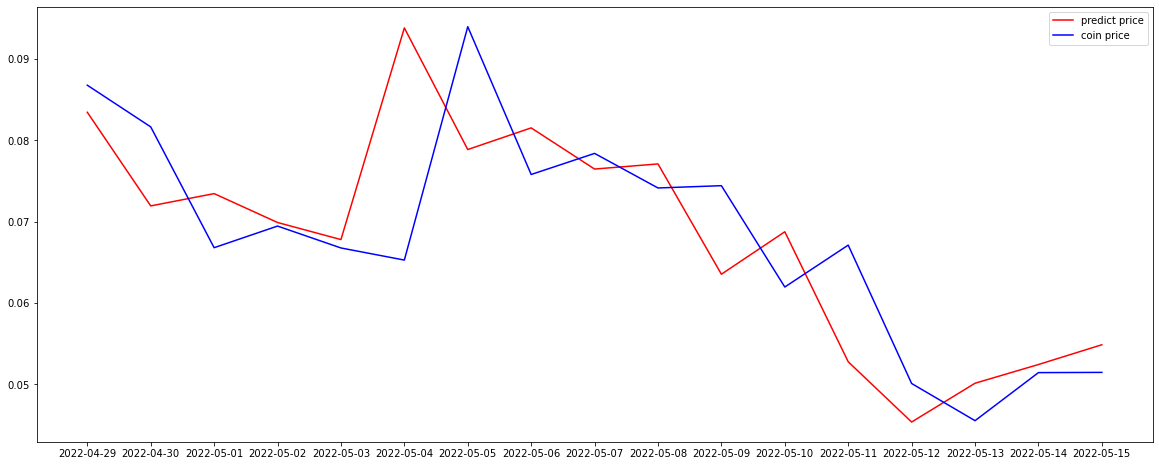

In [12]:
gfmodel.visualize()

In [13]:
result.to_csv('ZILLIQA_result_data')
gfmodel.save_csv('ZILLIQA_Visulize_data.csv')